Enter your name: Balaji
Choose a location:
1. Chennai
2. NewYork
3. LosAngeles
4. London
Enter choice (1-4): 2

Choose a date:
1. 15 MAR 2025
2. 22 APR 2025
3. 10 JUN 2025
4. 30 DEC 2025
Enter choice (1-4): 3

Choose an artist:
1. Taylor Swift
2. Ed Sheeran
3. Ariana Grande
4. Billie Eilish
Enter choice (1-4): 4

Ticket generated successfully: /content/pdf/concert_ticket.pdf
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
poppler-utils is already the newest version (22.02.0-2ubuntu0.8).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


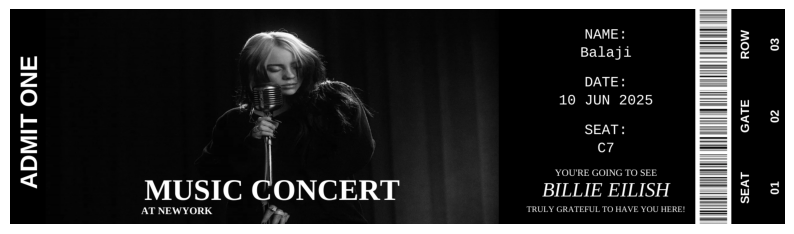

In [40]:
!pip install reportlab
from google.colab import files
import random
from reportlab.pdfgen import canvas
from reportlab.lib.colors import black, white

# Predefined options
name = input("Enter your name: ").strip().title()
locations = ["Chennai", "NewYork", "LosAngeles", "London"]
dates = ["15 MAR 2025", "22 APR 2025", "10 JUN 2025", "30 DEC 2025"]
artists = ["Taylor Swift", "Ed Sheeran", "Ariana Grande", "Billie Eilish"]
artist_images = {
    "Taylor Swift": "/content/pdf/ts.jpeg",
    "Ed Sheeran": "/content/pdf/ed.jpg",
    "Ariana Grande": "/content/pdf/Ad.jpg",
    "Billie Eilish": "/content/pdf/be.jpg"
}
seats = [f"{row}{num}" for row in "ABCDEF" for num in range(1, 21)]  # A1 - F20

# Let user choose
print("Choose a location:")
for i, loc in enumerate(locations, 1):
    print(f"{i}. {loc}")
location = locations[int(input("Enter choice (1-4): ")) - 1]

print("\nChoose a date:")
for i, dt in enumerate(dates, 1):
    print(f"{i}. {dt}")
date = dates[int(input("Enter choice (1-4): ")) - 1]

print("\nChoose an artist:")
for i, art in enumerate(artists, 1):
    print(f"{i}. {art}")
artist = artists[int(input("Enter choice (1-4): ")) - 1]

seat = random.choice(seats)  # Randomly assign a seat
artist_img = artist_images[artist]  # Assign image dynamically

# File paths
pdf_path = "/content/pdf/concert_ticket.pdf"
bar = "/content/pdf/PY2.png"  # Barcode image

# PDF dimensions
pdf_width, pdf_height = 650, 180

# Image sizes & positions
img_width1, img_height1 = 380, 180  # Left image (artist)
x_offset1, y_offset1 = 30, 0

img_width2, img_height2 = 30, 250   # Right barcode
x_offset2, y_offset2 = 575, -20

# Text blocks (dynamic values)
text_blocks = [
    (["ADMIT ONE"], 23, 85, 90, 20, "Helvetica-Bold", 25),
    ([f"AT {location.upper()}"], 140, 8, 0, 8.5, "Times-Bold", 45),
    (["MUSIC CONCERT"], 220, 20, 0, 25, "Times-Bold", 20),
    (["NAME:", name], 500, 155, 0, 12, "Courier", 15),
    (["DATE:", date], 500, 115, 0, 12, "Courier", 15),
    (["SEAT:", seat], 500, 75, 0, 12, "Courier", 15),
    (["YOU'RE GOING TO SEE"], 500, 40, 0, 8, "Times-Roman", 20),
    ([artist.upper()], 500, 23, 0, 17, "Times-Italic", 20),
    (["TRULY GRATEFUL TO HAVE YOU HERE!"], 500, 10, 0, 7, "Times-Roman", 12),
    (["SEAT","01"], 620, 30, 90, 10, "Helvetica-Bold", 25),
    (["GATE", "02"], 620, 90, 90, 10, "Helvetica-Bold", 25),
    (["ROW", "03"], 620, 150, 90, 10, "Helvetica-Bold", 25)
]

def generate_ticket(c):
    c.setFillColor(black)
    c.rect(0, 0, pdf_width, pdf_height, fill=1)

    # Draw images
    c.drawImage(artist_img, x_offset1, y_offset1, img_width1, img_height1, preserveAspectRatio=False, mask=None)
    c.saveState()
    c.translate(x_offset2 + img_width2, y_offset2)
    c.rotate(90)
    c.drawImage(bar, 0, 0, img_height2, img_width2, preserveAspectRatio=False, mask=None)
    c.restoreState()

    # Draw text
    c.setFillColor(white)
    for lines, x, y, rotation, size, font, spacing in text_blocks:
        c.saveState()
        c.translate(x, y)
        c.rotate(rotation)
        c.setFont(font, size)
        for i, line in enumerate(lines):
            c.drawCentredString(0, -i * spacing, line)
        c.restoreState()

# Generate PDF
c = canvas.Canvas(pdf_path, pagesize=(pdf_width, pdf_height))
generate_ticket(c)
c.showPage()
c.save()

print(f"\nTicket generated successfully: {pdf_path}")


# Install required libraries
!pip install pdf2image
!apt-get install -y poppler-utils

from pdf2image import convert_from_path
import matplotlib.pyplot as plt

# Path to your PDF file
pdf_path = "/content/pdf/concert_ticket.pdf"

# Convert PDF to images (one per page)
images = convert_from_path(pdf_path)

# Display each image (for each page of the PDF)
for img in images:
    plt.figure(figsize=(10, 12))
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.show()
